# Linear Regression Lab

### Part 1: Load  data

Import "mtcars.csv"

In [1]:
import pandas as pd # use pandas to read the csv file
mtcars = pd.read_csv('mtcars.csv', index_col=0) # the first column is 'model' name
mtcars.head() # print head column from mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [2]:
mtcars.info() # this data non-null values

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


### Part 2: Preprocess data

In [3]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


#### 2.1 Pairwise correlation

In [4]:
mtcars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [5]:
mtcars.mpg.corr(mtcars.drat) # correlation coeff. between the 'mpg' and  'drat'

0.6811719078067495

-0.8676593765172281


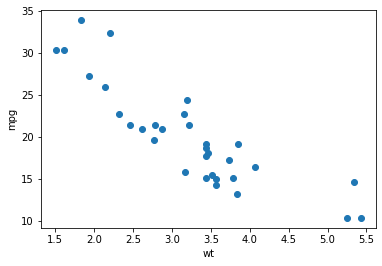

In [6]:
import matplotlib.pyplot as plt

plt.scatter(mtcars.wt,mtcars.mpg)
plt.xlabel('wt')
plt.ylabel('mpg')
print(mtcars.wt.corr(mtcars.mpg))

0.7909485863698065


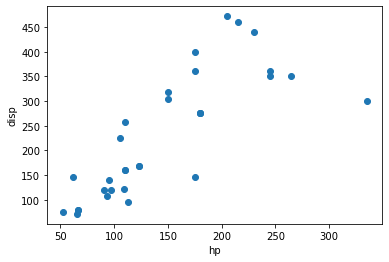

In [7]:
# correlation between "hp" and "disp"
plt.scatter(mtcars.hp,mtcars.disp)
plt.xlabel('hp')
plt.ylabel('disp')
print(mtcars.hp.corr(mtcars.disp))

0.09120475965118297


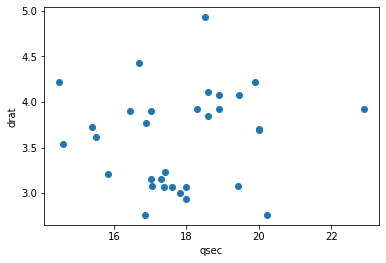

In [8]:
# correlation between "qsec" and "drat"
plt.scatter(mtcars.qsec,mtcars.drat)
plt.xlabel('qsec')
plt.ylabel('drat')
print(mtcars.qsec.corr(mtcars.drat))

<AxesSubplot:xlabel='wt', ylabel='mpg'>

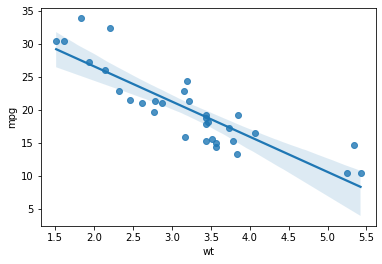

In [9]:
import seaborn as sns
sns.regplot(data = mtcars, x='wt', y='mpg',fit_reg=True)

In [10]:
#Try calculating correlation between others parameters

#### 2.2 Train/Test separation

Perform hold-out method
- 60% training set
- 40% testing set

In [11]:
# The mtcars dataset is too small. No need the train/test separation.

##### X/y separation

In [12]:
y = mtcars['mpg']
X = mtcars[['wt']]

### Part 3: Train linear regression models

Using scikit-learn

In [13]:
# wt vs mpg

from sklearn import linear_model as lm

model = lm.LinearRegression()
results = model.fit(X,y)

print(model.intercept_, model.coef_)
# The equation is -mpg = 5.344wt + 37.285

37.28512616734204 [-5.34447157]


### Part 4: Model Evaluation

In [14]:
y_pred = model.predict(X) # 'wt' is input
y_error = y - y_pred
y_error

model
Mazda RX4             -2.282611
Mazda RX4 Wag         -0.919770
Datsun 710            -2.085952
Hornet 4 Drive         1.297350
Hornet Sportabout     -0.200144
Valiant               -0.693255
Duster 360            -3.905363
Merc 240D              4.163738
Merc 230               2.349959
Merc 280               0.299856
Merc 280C             -1.100144
Merc 450SE             0.866873
Merc 450SL            -0.050247
Merc 450SLC           -1.883024
Cadillac Fleetwood     1.173350
Lincoln Continental    2.103288
Chrysler Imperial      5.981074
Fiat 128               6.872711
Honda Civic            1.746195
Toyota Corolla         6.421979
Toyota Corona         -2.611004
Dodge Challenger      -2.972586
AMC Javelin           -3.726866
Camaro Z28            -3.462355
Pontiac Firebird       2.464367
Fiat X1-9              0.356426
Porsche 914-2          0.152043
Lotus Europa           1.201059
Ford Pantera L        -4.543151
Ferrari Dino          -2.780940
Maserati Bora         -3.205363
Vo

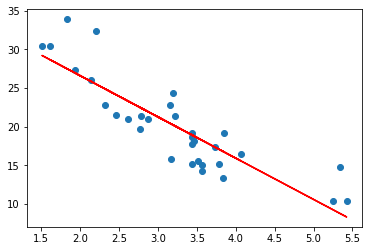

In [15]:
plt.scatter(X,y)
plt.plot(X.squeeze(),y_pred,color='red')

In [16]:
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.7528327936582646

## Alternative training method (Part 3 & 4)

Using statsmodels

In [17]:
import statsmodels.api as sm

# Build new model please change the model name.
model2 = sm.OLS(y,X).fit() # OLS is Ordinary Least Sqaure
model2.summary()
# There is no intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.720
Model:                            OLS   Adj. R-squared (uncentered):              0.711
Method:                 Least Squares   F-statistic:                              79.58
Date:                Wed, 24 Aug 2022   Prob (F-statistic):                    4.55e-10
Time:                        10:16:42   Log-Likelihood:                         -122.40
No. Observations:                  32   AIC:                                      246.8
Df Residuals:                      31   BIC:                                      248.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wt             5.2916      0.593      8.921      0.000       4.082       6.501
==============================================================================
Omnibus:                        0.255   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.880   Jarque-Bera (JB):                0.317
Skew:                           0.189   Prob(JB):                        0.854
Kurtosis:                       2.692   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
Xc = sm.add_constant(X)
Xc.head()

,const,wt
model,,
Mazda RX4,1.0,2.620
Mazda RX4 Wag,1.0,2.875
Datsun 710,1.0,2.320
Hornet 4 Drive,1.0,3.215
Hornet Sportabout,1.0,3.440


In [19]:
model3 = sm.OLS(y,Xc).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           1.29e-10
Time:                        10:16:42   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Simple linear regression lab

Try building models with others parameters (y=mpg)

In [49]:
# x=hp
mtcars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [50]:
Laby = mtcars['mpg']
LabX = mtcars[['hp']]

In [51]:
# hp vs mpg
from sklearn import linear_model as lm

LabModel = lm.LinearRegression()
Labresults = LabModel.fit(LabX,Laby)

print(LabModel.intercept_, LabModel.coef_)

30.098860539622496 [-0.06822828]


In [52]:
Laby_pred = LabModel.predict(LabX) # 'hp' is input
Laby_error = Laby - Laby_pred
Laby_error

model
Mazda RX4             -1.593750
Mazda RX4 Wag         -1.593750
Datsun 710            -0.953631
Hornet 4 Drive        -1.193750
Hornet Sportabout      0.541088
Valiant               -4.834891
Duster 360             0.917068
Merc 240D             -1.468707
Merc 230              -0.817174
Merc 280              -2.506782
Merc 280C             -3.906782
Merc 450SE            -1.417770
Merc 450SL            -0.517770
Merc 450SLC           -2.617770
Cadillac Fleetwood    -5.712064
Lincoln Continental   -5.029781
Chrysler Imperial      0.293643
Fiat 128               6.804206
Honda Civic            3.849010
Toyota Corolla         8.235978
Toyota Corona         -1.980718
Dodge Challenger      -4.364619
AMC Javelin           -4.664619
Camaro Z28            -0.082932
Pontiac Firebird       1.041088
Fiat X1-9              1.704206
Porsche 914-2          2.109913
Lotus Europa           8.010935
Ford Pantera L         3.713405
Ferrari Dino           1.541088
Maserati Bora          7.757613
Vo

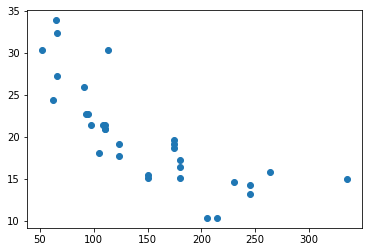

In [53]:
plt.scatter(LabX,Laby)

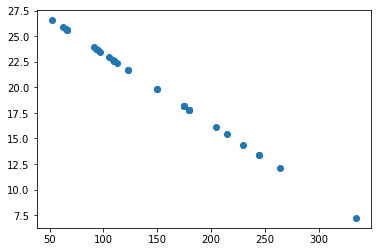

In [54]:
plt.scatter(LabX,Laby_pred)

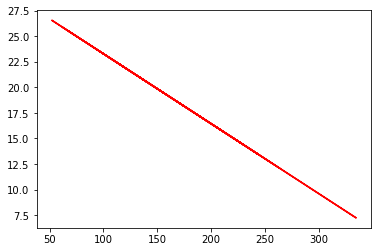

In [55]:
plt.plot(LabX.squeeze(),Laby_pred,color='red')

In [56]:
from sklearn.metrics import r2_score

r2_score(Laby, Laby_pred)

0.602437341423934

Discuss results
Why do you select 'hp'?

## Multiple Linear Regression

In [27]:
# Multiple regression additive model
X1 = mtcars
Xc = sm.add_constant(X1)
Xc.head()

,const,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,,
Mazda RX4,1.0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,1.0,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,1.0,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,1.0,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,1.0,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [28]:
m_model = sm.OLS(y,Xc[['wt','hp','const']]).fit()
m_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           9.11e-12
Time:                        10:16:42   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wt            -3.8778      0.633     -6.129      0.000      -5.172      -2.584
hp            -0.0318      0.009     -3.519      0.001      -0.050      -0.013
const         37.2273      1.599     23.285      0.000      33.957      40.497
==============================================================================
Omnibus:                        5.303   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.046
Skew:                           0.855   Prob(JB):                        0.132
Kurtosis:                       3.332   Cond. No.                         588.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Adding interaction term
Xc['hp:wt'] = Xc['hp']*Xc['wt']
Xc.head()

,const,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,hp:wt
model,,,,,,,,,,,,,
Mazda RX4,1.0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,288.20
Mazda RX4 Wag,1.0,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,316.25
Datsun 710,1.0,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,215.76
Hornet 4 Drive,1.0,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,353.65
Hornet Sportabout,1.0,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,602.00


In [30]:
m_model2 = sm.OLS(y,Xc[['wt','hp','hp:wt','const']]).fit()
m_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     71.66
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           2.98e-13
Time:                        10:16:42   Log-Likelihood:                -67.805
No. Observations:                  32   AIC:                             143.6
Df Residuals:                      28   BIC:                             149.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wt            -8.2166      1.270     -6.471      0.000     -10.818      -5.616
hp            -0.1201      0.025     -4.863      0.000      -0.171      -0.070
hp:wt          0.0278      0.007      3.753      0.001       0.013       0.043
const         49.8084      3.605     13.816      0.000      42.424      57.193
==============================================================================
Omnibus:                        2.221   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.736
Skew:                           0.407   Prob(JB):                        0.420
Kurtosis:                       2.200   Cond. No.                     6.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### statsmodels.formula

In [31]:
import statsmodels.formula.api as smf
model_01 = smf.ols(formula='mpg ~ wt + hp', data=mtcars).fit()
model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           9.11e-12
Time:                        10:16:42   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2273      1.599     23.285      0.000      33.957      40.497
wt            -3.8778      0.633     -6.129      0.000      -5.172      -2.584
hp            -0.0318      0.009     -3.519      0.001      -0.050      -0.013
==============================================================================
Omnibus:                        5.303   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.046
Skew:                           0.855   Prob(JB):                        0.132
Kurtosis:                       3.332   Cond. No.                         588.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model_02 = smf.ols(formula='mpg ~ wt * hp', data=mtcars).fit()
model_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     71.66
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           2.98e-13
Time:                        10:16:42   Log-Likelihood:                -67.805
No. Observations:                  32   AIC:                             143.6
Df Residuals:                      28   BIC:                             149.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.8084      3.605     13.816      0.000      42.424      57.193
wt            -8.2166      1.270     -6.471      0.000     -10.818      -5.616
hp            -0.1201      0.025     -4.863      0.000      -0.171      -0.070
wt:hp          0.0278      0.007      3.753      0.001       0.013       0.043
==============================================================================
Omnibus:                        2.221   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.736
Skew:                           0.407   Prob(JB):                        0.420
Kurtosis:                       2.200   Cond. No.                     6.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""